In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Importing the Entire Dataset
dataset_full = pd.read_csv('2021_10_24_cleaned_lake_dataset_full.csv', header=0, index_col=0)
dataset_full = dataset_full.rename(columns={'actual_conductivity':'cond', 'do_concentration':'do', 'turbidity':'turb', 'chl-a_concentration':'chl-a', 'temperature':'temp'})
dataset_full = dataset_full[['temp', 'cond', 'do', 'turb', 'chl-a']]
dataset_full.sort_index()
print(dataset_full.shape)
dataset_full.tail()

(8516, 5)


,temp,cond,do,turb,chl-a
datetime,,,,,
2019-10-07 14:43:57,28.97082,115.0504,5.775121,165.7193,971.7914
2019-10-07 14:58:57,29.59904,120.0654,11.594970,188.2978,1027.1150
2019-10-07 17:13:57,29.18500,115.7554,7.265903,251.9312,1032.9170
2019-10-08 14:44:46,28.89604,115.3140,6.730115,239.6638,1059.8350
2019-10-09 09:00:26,28.61342,114.8307,4.135980,258.1431,767.3123


In [3]:
#Importing the Feb-Apr Dataset
dataset_feb_apr = pd.read_csv('2021_11_03_cleaned_lake_dataset_feb-apr.csv', header=0, index_col=0)
dataset_feb_apr = dataset_feb_apr.rename(columns={'actual_conductivity':'cond', 'do_concentration':'do', 'turbidity':'turb', 'chl-a_concentration':'chl-a', 'temperature':'temp'})
dataset_feb_apr = dataset_feb_apr[['temp', 'cond', 'do', 'turb', 'chl-a']]
dataset_feb_apr.sort_index()
print(dataset_feb_apr.shape)
dataset_feb_apr.tail()

(6212, 5)


,temp,cond,do,turb,chl-a
datetime,,,,,
2019-04-05 09:00:17,28.91959,76.91243,3.080355,63.40566,49.60603
2019-04-05 09:10:17,28.94431,76.73137,3.062878,72.05052,47.30184
2019-04-05 09:20:17,28.93608,76.69234,2.589782,63.05659,44.22813
2019-04-05 09:30:17,28.94136,76.72667,2.999108,80.66748,45.35073
2019-04-05 09:40:17,28.96102,76.72181,3.165897,68.04305,44.16881


(6813, 5)
(1703, 5)


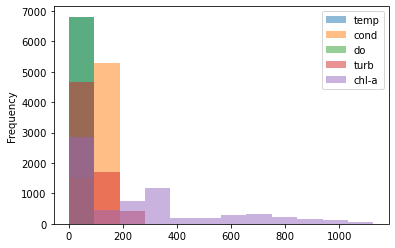

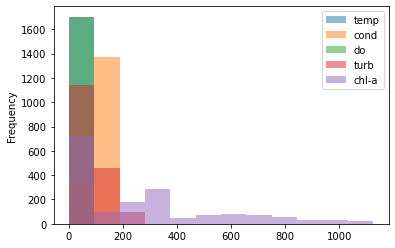

In [4]:
#Entire Dataset Train-Test Random Split 80-20

train_dataset_full = dataset_full.sample(frac=0.8) #80% split
test_dataset_full = dataset_full.drop(train_dataset_full.index)

print(train_dataset_full.shape)
print(test_dataset_full.shape)

ax = train_dataset_full.plot.hist(bins=12, alpha=0.5)
ax2 = test_dataset_full.plot.hist(bins=12, alpha=0.5)

#Commented out cause every time new randomly split data will be generated
#Load test data while testing Pickle Model

# train_dataset_full.to_csv("azure_wq_train_entire_dataset.csv")
# test_dataset_full.to_csv("azure_wq_test_entire_dataset.csv")

(4970, 5)
(1242, 5)


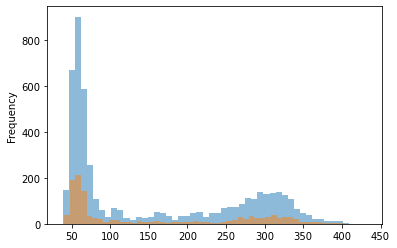

In [5]:
#Feb-Apr Dataset Train-Test Random Split 80-20

train_dataset_feb_apr = dataset_feb_apr.sample(frac=0.8) #80% split
test_dataset_feb_apr = dataset_feb_apr.drop(train_dataset_feb_apr.index)

print(train_dataset_feb_apr.shape)
print(test_dataset_feb_apr.shape)

param = 'chl-a'
ax = train_dataset_feb_apr[param].plot.hist(bins=50, alpha=0.5)
ax2 = test_dataset_feb_apr[param].plot.hist(bins=50, alpha=0.5)

#'temp', 'cond', 'do', 'turb', 'chl-a'
#Commented out cause every time new randomly split data will be generated
#Load test data while testing Pickle Model

# train_dataset_feb_apr.to_csv("azure_wq_train_feb_apr_dataset.csv")
# test_dataset_feb_apr.to_csv("azure_wq_test_feb_apr_dataset.csv")

# Testing the Azure Entire Dataset Model


In [32]:
#Testing the entire dataset model
#Incase pickle is not working, use this command in conda shell/prompt 
# conda install -c conda-forge/label/cf202003 cloudpickle

filename = 'entire_ds_model.pkl'
entire_ds_model = pickle.load(open(filename, 'rb'))

#Importing the Entire Dataset
dataset_full_test = pd.read_csv('azure_wq_test_entire_dataset.csv')

dataset_full_test = dataset_full_test[['datetime','temp', 'cond', 'do', 'turb', 'chl-a']]
dataset_full_test.sort_index()
print(dataset_full_test.shape)
dataset_full_test.tail()



(1703, 6)


,datetime,temp,cond,do,turb,chl-a
1698,2019-10-07 09:28:57,28.85,114.82,4.18,233.61,756.15
1699,2019-10-07 09:43:57,28.86,114.97,4.15,162.08,700.53
1700,2019-10-07 12:13:57,28.92,114.65,4.95,198.85,705.66
1701,2019-10-07 12:43:57,28.96,115.16,5.22,205.18,707.68
1702,2019-10-08 14:44:46,28.90,115.31,6.73,239.66,1059.84


In [33]:
#Preparing Input & Output Features
X = dataset_full_test[:]
Y = X.pop('chl-a')
print(X.shape)
print(Y.shape)
Y.head()

(1703, 5)
(1703,)


0   39.65
1   40.57
2   40.88
3   47.05
4   59.40
Name: chl-a, dtype: float64

0.989325824758732


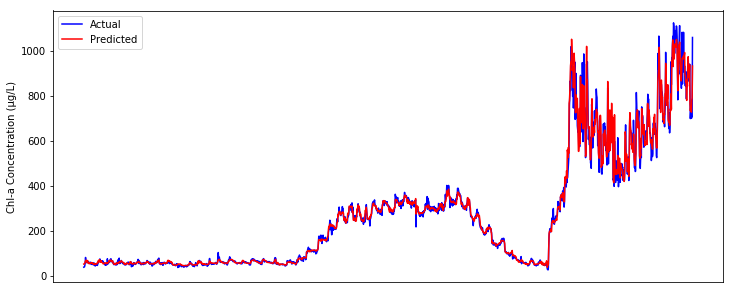

In [34]:
#Testing the model on test dataset
result = entire_ds_model.score(X,Y)
predicted_Y = pd.DataFrame(entire_ds_model.predict(X))
print(result)

plt.figure(figsize=(12,5))

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(Y, color='blue', label = 'Actual')

plt.plot(predicted_Y, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()

# Testing the Azure Feb-Apr Dataset Model


In [35]:
#Testing the entire dataset model
filename = 'feb_apr_model.pkl'
feb_apr_ds_model = pickle.load(open(filename, 'rb'))

#Importing the Entire Dataset
dataset_feb_apr_test = pd.read_csv('azure_wq_test_feb_apr_dataset.csv')

dataset_feb_apr_test = dataset_feb_apr_test[['datetime','temp', 'cond', 'do', 'turb', 'chl-a']]
dataset_feb_apr_test.sort_index()
print(dataset_feb_apr_test.shape)
dataset_feb_apr_test.tail()

(1242, 6)


,datetime,temp,cond,do,turb,chl-a
1237,2019-04-05 01:30:17,29.37,77.25,4.62,75.09,53.70
1238,2019-04-05 03:00:17,29.27,76.99,4.39,66.07,53.35
1239,2019-04-05 03:50:17,29.20,77.41,4.13,61.59,50.40
1240,2019-04-05 05:10:17,29.11,76.98,3.83,74.97,51.54
1241,2019-04-05 08:10:17,28.91,76.64,3.15,69.13,48.78


In [36]:
#Preparing Input & Output Features
X_2 = dataset_feb_apr_test[:]
Y_2 = X_2.pop('chl-a')
print(X_2.shape)
print(Y_2.shape)
Y_2.head()

(1242, 5)
(1242,)


0   39.65
1   40.88
2   46.68
3   45.46
4   52.36
Name: chl-a, dtype: float64

0.9960885770771088


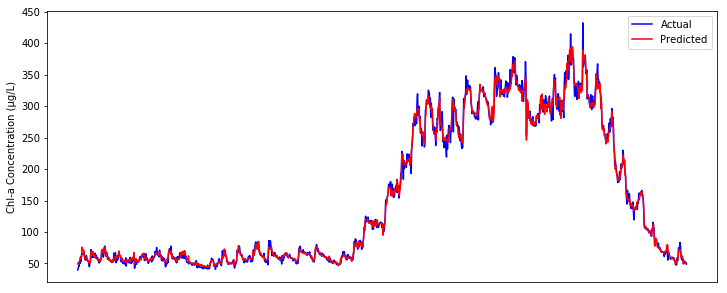

In [37]:
#Testing the model on test dataset
result_2 = feb_apr_ds_model.score(X_2,Y_2)
predicted_Y_2 = pd.DataFrame(feb_apr_ds_model.predict(X_2))
print(result_2)

plt.figure(figsize=(12,5))

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(Y_2, color='blue', label = 'Actual')

plt.plot(predicted_Y_2, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()